# A Statistical Study of Word Relationships in 200,000 Nepali Articles

## Introduction

This project analyzes 200,000 Nepali news articles using statistical and probabilistic techniques to map how words relate to each other. Zipf’s Law is used to verify the data and PMI to find "semantic glue" between important word pairs. By applying Bayesian Inference, Entropy and KL Divergence, we measure how much information a word provides and how it narrows down a topic. Finally, we visualize these connections in an interactive graph, which reveals that the language naturally organizes itself into "islands" of meaning like politics, health, and weather.

In [1]:
import pickle
import math
from collections import Counter

# Load your previous work
with open('/kaggle/input/200k-news-frequencies/nepali_unigram.pkl', 'rb') as f:
    unigram_counter = pickle.load(f)
with open('/kaggle/input/200k-news-frequencies/nepali_bigram.pkl', 'rb') as f:
    bigram_counter = pickle.load(f)

# Load stopwords from text file
with open('/kaggle/input/200k-news-frequencies/nepali_stopwords.txt', 'r', encoding='utf-8') as f:
    stop_words = set(line.strip() for line in f)

# Create non-stopword unigram counter
non_stopword_unigram = Counter({
    w: c for w, c in unigram_counter.items() 
    if w not in stop_words and c > 5
})

# Create non-stopword bigram counter
# Only keep bigrams where BOTH words are non-stopwords
non_stopword_bigram = Counter({
    (w1, w2): c for (w1, w2), c in bigram_counter.items() 
    if w1 in non_stopword_unigram and w2 in non_stopword_unigram
})

In [2]:
# Load stopwords from text file
with open('/kaggle/input/200k-news-frequencies/nepali_stopwords.txt', 'r', encoding='utf-8') as f:
    stop_words = set(line.strip() for line in f)

In [3]:
len(non_stopword_bigram)

7547412

In [4]:
print("\nTop 20 unigrams:")
for w, c in non_stopword_unigram.most_common(20):
    print(f"{w}: {c}")

print("\nTop 20 bigrams:")
for (w1, w2), c in non_stopword_bigram.most_common(20):
    print(f"{w1} {w2}: {c}")


Top 20 unigrams:
नेपाल: 124197
गरिएको: 116088
काठमाडौं: 112703
नेपाली: 93578
जानकारी: 80695
प्रहरी: 74193
अध्यक्ष: 73625
प्रमुख: 68659
सरकारले: 67150
प्रधानमन्त्री: 65547
साउन: 64350
प्रदेश: 64055
वर्ष: 58119
राष्ट्रिय: 57821
स्थानीय: 57652
जनाएको: 55968
जिल्ला: 55579
निर्माण: 53976
विभिन्न: 51163
आर्थिक: 49044

Top 20 bigrams:
केपी शर्मा: 22985
प्रधानमन्त्री केपी: 17393
प्रहरी कार्यालय: 12462
सशस्त्र प्रहरी: 11718
जिल्ला प्रहरी: 11308
नेपाली कांग्रेसका: 10110
विश्वासको मत: 9679
आर्थिक वर्ष: 9322
पुष्पकमल दाहाल: 8768
नेकपा माओवादी: 8683
काठमाडौं साउन: 8028
जानकारी दिनुभयो: 8022
नेकपा एमाले: 7847
प्रहरीले जनाएको: 7543
शर्मा ओलीले: 7394
शर्मा ओली: 7299
पक्राउ परेका: 7192
माओवादी केन्द्र: 7092
कार्यकारी निर्देशक: 6797
प्रहरी निरीक्षक: 6705


To determine a reasonable threshold for 200k-article corpus,it is required to viisualize the distribution of unigram frequencies using a Zipf Plot (log-log scale) and a Frequency Distribution plot.

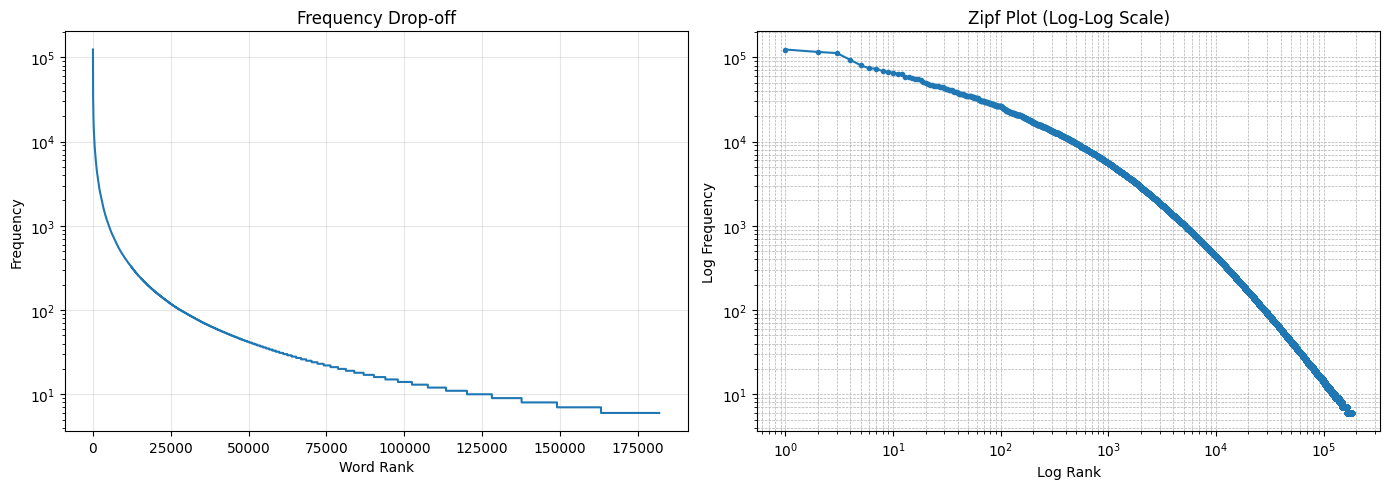

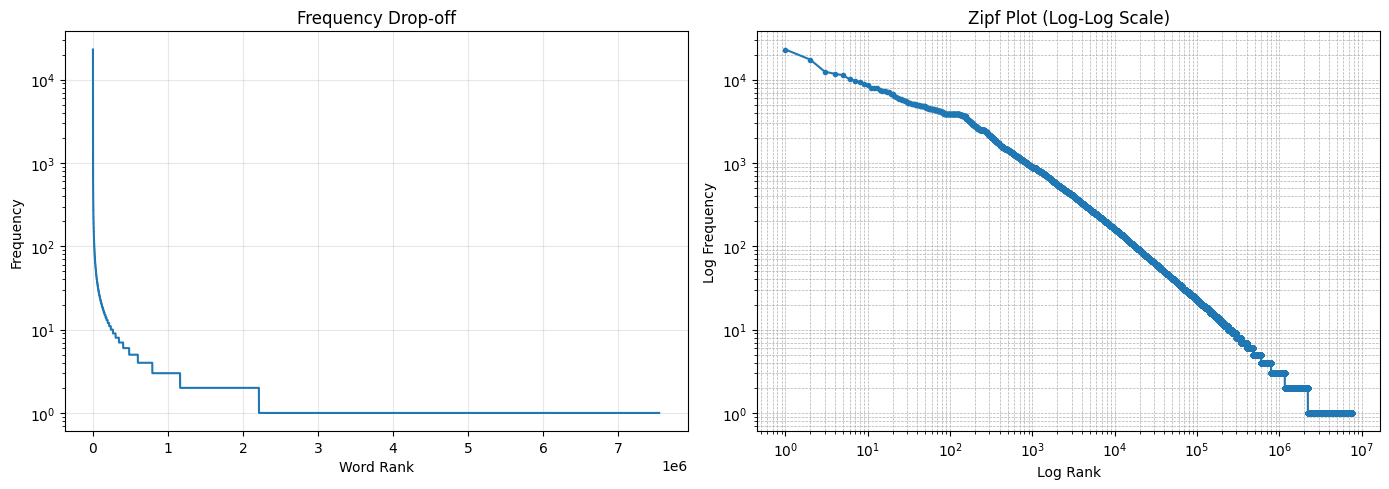

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_frequency_distribution(counter):
    # Sort frequencies in descending order
    freqs = sorted(counter.values(), reverse=True)
    ranks = np.arange(1, len(freqs) + 1)

    plt.figure(figsize=(14, 5))

    # Plot 1: Standard Linear Frequency (to see the "Long Tail")
    plt.subplot(1, 2, 1)
    plt.semilogy(ranks[:], freqs[:])
    plt.title("Frequency Drop-off")
    plt.xlabel("Word Rank")
    plt.ylabel("Frequency")
    plt.grid(True, alpha=0.3)

    # Plot 2: Zipf's Law (Log-Log) [cite: 154, 186]
    plt.subplot(1, 2, 2)
    plt.loglog(ranks, freqs, marker=".")
    plt.title("Zipf Plot (Log-Log Scale)")
    plt.xlabel("Log Rank")
    plt.ylabel("Log Frequency")
    plt.grid(True, which="both", ls="--", lw=0.5)

    plt.tight_layout()
    plt.show()


plot_frequency_distribution(non_stopword_unigram)
plot_frequency_distribution(non_stopword_bigram)

To ensure statistical significance, a frequency threshold of $x = 100$ was selected based on an empirical analysis of the corpus's Zipfian distribution. While Zipf's Law suggests that rare words comprise the 'long tail' of the distribution, these words lack sufficient co-occurrence data to produce reliable Pointwise Mutual Information (PMI) scores. By filtering the unigram counters to words with $c \geq 100$, and bigram words with $ c_1, c_2 \geq 100 $ we focus the model on the core semantic structure of the Nepali language while mitigating noise from typos and rare entities

In [21]:
# update with threshold > 100
final_unigram = Counter({
    w: c for w, c in unigram_counter.items() 
    if w not in stop_words and c > 100
})

# Create non-stopword bigram counter
# Only keep bigrams where BOTH words are non-stopwords
final_bigram = Counter({
    (w1, w2): c for (w1, w2), c in bigram_counter.items() 
    if w1 in non_stopword_unigram and w2 in non_stopword_unigram and c > 100
})


In [7]:
print("total unigram: ",len(final_unigram))
print("total bigram: ",len(final_bigram))

total unigram:  27926
total bigram:  17446


In [8]:
print("\nTop 20 unigrams:")
for w, c in non_stopword_unigram.most_common(20):
    print(f"{w}: {c}")

print("\nTop 20 least frequent bigrams:")
for (w1, w2), c in final_bigram.most_common()[-20:]:
    print(f"{w1} {w2}: {c}")


Top 20 unigrams:
नेपाल: 124197
गरिएको: 116088
काठमाडौं: 112703
नेपाली: 93578
जानकारी: 80695
प्रहरी: 74193
अध्यक्ष: 73625
प्रमुख: 68659
सरकारले: 67150
प्रधानमन्त्री: 65547
साउन: 64350
प्रदेश: 64055
वर्ष: 58119
राष्ट्रिय: 57821
स्थानीय: 57652
जनाएको: 55968
जिल्ला: 55579
निर्माण: 53976
विभिन्न: 51163
आर्थिक: 49044

Top 20 least frequent bigrams:
दबाब दिइरहेका: 101
मतगणना सम्पन्न: 101
१५ मिनेटमा: 101
मापदण्ड निर्धारण: 101
क्रियाशील सदस्यको: 101
मार्ने उद्योग: 101
मठ मन्दिर: 101
विश्व आर्थिक: 101
पकाउने ग्यास: 101
रुपैयाँ शुल्क: 101
बहुमतका आधारमा: 101
खानेपानी आयोजनामा: 101
शिक्षा सम्बन्धी: 101
उपचार निःशुल्क: 101
कडा आलोचना: 101
सक्रिय रहने: 101
न्याय सुशासन: 101
२५ किलोमिटर: 101
सांसद शर्माले: 101
परिवार नियोजनको: 101


Using these new counters, we calculate the probability distributions $P(w)$ and $P(w_1, w_2)$.

In [9]:
total_u = sum(final_unigram.values())
total_b = sum(final_bigram.values()) 

# Probabilities
prob_unigram = {w: c / total_u for w, c in final_unigram.items()}
prob_bigram = {(w1, w2): c / total_b for (w1, w2), c in final_bigram.items()}

## Statistical & Probabilistic Analysis
Now we apply: PMI for association, Entropy for uncertainty, and KL Divergence for information gain.

### PMI (Association Strength)$$PMI(w_1, w_2) = \log_2 \frac{P(w_1, w_2)}{P(w_1)P(w_2)}$$

In [10]:
import math

pmi_results = {}
min_freq = 300  # threshold

for (w1, w2), p12 in prob_bigram.items():
    freq = final_bigram[(w1, w2)]
    if freq >= min_freq:
        p1 = prob_unigram[w1]
        p2 = prob_unigram[w2]
        pmi = math.log2(p12 / (p1 * p2))
        if pmi > 0:  # only positive associations
            pmi_results[(w1, w2)] = (pmi, freq)

# Sort by PMI descending
sorted_pmi = sorted(pmi_results.items(), key=lambda x: x[1][0], reverse=True)

# Print top 20
print("Top 20 bigrams by PMI (freq >= 300):")
for (w1, w2), (score, freq) in sorted_pmi[:20]:
    print(f"{w1} {w2}: PMI={score:.2f}, freq={freq}")

Top 20 bigrams by PMI (freq >= 300):
एन्डिज क्षेत्रकोे: PMI=18.38, freq=419
बोलिभियाको एन्डिज: PMI=18.36, freq=419
नकराएको नचिच्याएको: PMI=18.36, freq=439
दम्बुलामा यूएईमाथि: PMI=18.10, freq=434
इन्डियाको एआई१८३: PMI=18.08, freq=403
रुपाकोट मझुवागढी: PMI=18.07, freq=454
फार्मास्युटिकल इनोभेसन: PMI=18.05, freq=411
गभर्नरहरू निलम: PMI=18.03, freq=439
फोकल पर्सन: PMI=18.01, freq=410
हलेसी तुवाचुङ: PMI=18.00, freq=314
सेमिफाईनलमा कीर्गिस्तानसँग: PMI=17.99, freq=371
सिवाकोटी डाशंकरप्रसाद: PMI=17.99, freq=439
रूसको क्रास्नोयास्र्क: PMI=17.94, freq=403
मानुषी यमी: PMI=17.93, freq=476
आथिक सल्लाहकारको: PMI=17.93, freq=439
गायत्री दीक्षा: PMI=17.89, freq=337
जनउत्तरदायी सञ्चारकर्म: PMI=17.83, freq=527
जस्ताको तस्तै: PMI=17.77, freq=385
व्यावसायीक जनउत्तरदायी: PMI=17.73, freq=527
चिन्तामणि सिवाकोटी: PMI=17.73, freq=442


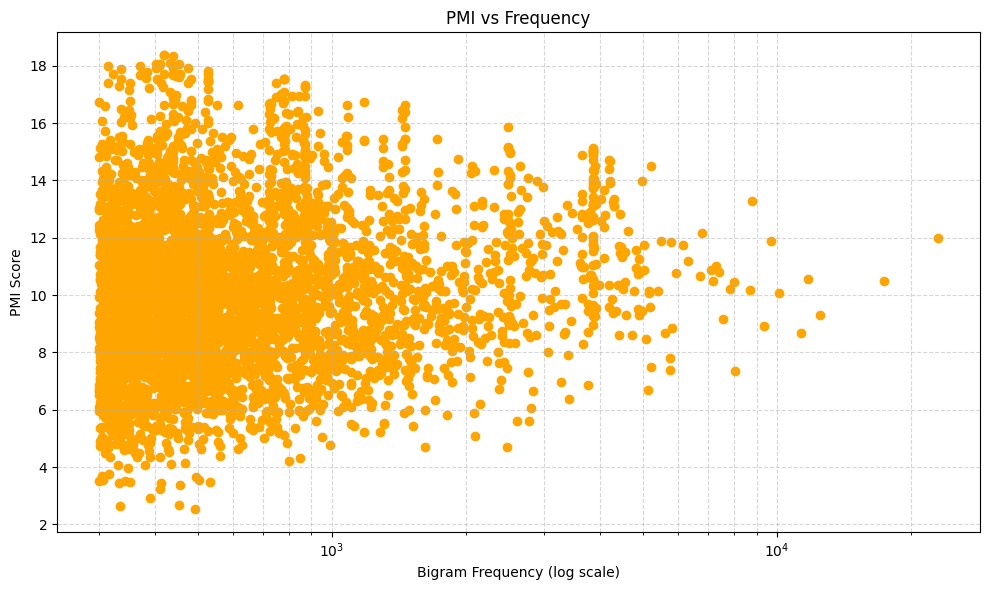

In [11]:
freqs = [freq for (w1, w2), (score, freq) in sorted_pmi[:]]
scores = [score for (w1, w2), (score, freq) in sorted_pmi[:]]
plt.figure(figsize=(10,6))
plt.scatter(freqs, scores, color='orange')
plt.xscale('log')  # bigrams frequency is skewed
plt.xlabel("Bigram Frequency (log scale)")
plt.ylabel("PMI Score")
plt.title(f"PMI vs Frequency")
plt.grid(True, which='both', ls='--', alpha=0.5)
plt.tight_layout()
plt.show()


High PMI but low frequency bigrams might be unreliable or noisy.
Very rare bigrams can have inflated PMI just by chance. These are often less useful in practical applications.

Very frequent bigrams tend to have low PMI scores.
These are often common collocations or function word pairs, but their association strength is weaker (more expected by chance).

The "sweet spot" for bigrams likely lies in the middle — moderately frequent with reasonably high PMI.
Bigrams that occur often enough to be reliable but still have high PMI scores are more meaningful collocations.

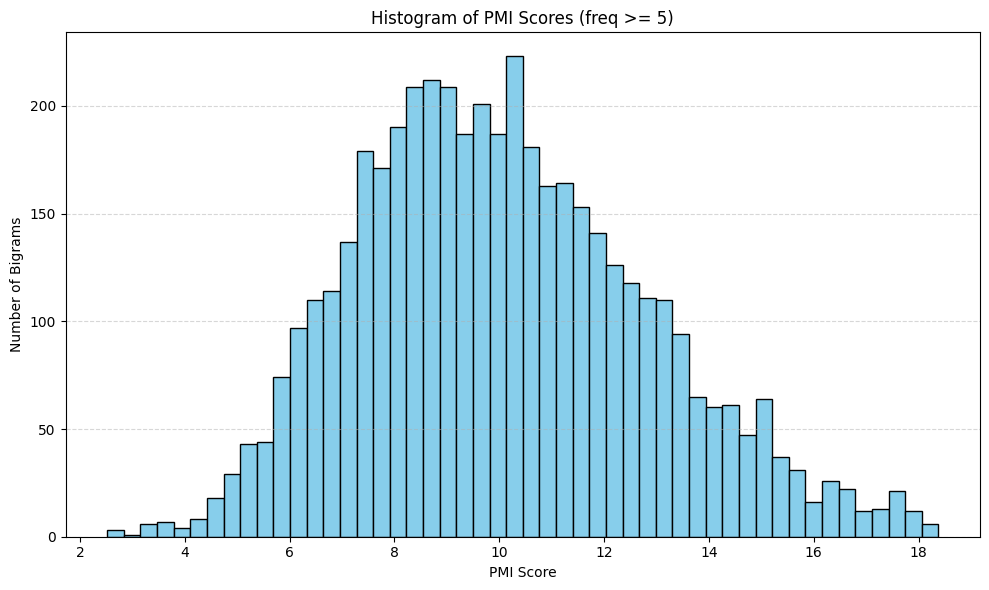

In [12]:
# Ehistogram
pmi_scores = [score for (bigram, (score, freq)) in sorted_pmi]

plt.figure(figsize=(10,6))
plt.hist(pmi_scores, bins=50, color='skyblue', edgecolor='black')
plt.xlabel("PMI Score")
plt.ylabel("Number of Bigrams")
plt.title("Histogram of PMI Scores (freq >= 5)")
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Emperical guess: PMI = 6-14, bigram_freq: >700

In [22]:
final_pmi = {}
min_freq = 700  # threshold

for (w1, w2), p12 in prob_bigram.items():
    freq = final_bigram[(w1, w2)]
    if freq >= min_freq:
        p1 = prob_unigram[w1]
        p2 = prob_unigram[w2]
        pmi = math.log2(p12 / (p1 * p2))
        if pmi >=6 and pmi <=14:  # only positive associations
            final_pmi[(w1, w2)] = (pmi, freq)

# Sort by PMI descending
final_pmi = sorted(final_pmi.items(), key=lambda x: x[1][0], reverse=True) #pmi
# final_pmi = sorted(final_pmi.items(), key=lambda x: x[1][1], reverse=True) #freq
print("total pmi calculted for : ", len(final_pmi))
# Print top 20
print("Top 20 bigrams by PMI:")
for (w1, w2), (score, freq) in final_pmi[:20]:
    print(f"{w1} {w2}: PMI={score:.2f}, freq={freq}")

total pmi calculted for :  1285
Top 20 bigrams by PMI:
ऊर्जा जलस्रोत: PMI=13.97, freq=2888
इन्टरनेशनल मिडिया: PMI=13.97, freq=4204
नक्कली भुटानी: PMI=13.97, freq=4961
किशोरी बलात्कार: PMI=13.95, freq=732
विचित्रको राजनीति: PMI=13.94, freq=3850
पालुङटार नगरपालिकाले: PMI=13.94, freq=791
प्रभु साहले: PMI=13.93, freq=787
रासायनिक मल: PMI=13.91, freq=767
मिडिया प्रालि: PMI=13.90, freq=4215
सत्तरोहणसँगै लोकतान्त्रिक: PMI=13.89, freq=2489
जोडिन सकिनेछ: PMI=13.89, freq=724
फरार अभियुक्त: PMI=13.88, freq=3918
सामान्यतया सफा: PMI=13.88, freq=968
सरकारमा शरदसिंह: PMI=13.86, freq=2489
मौसम पूर्वानुमान: PMI=13.85, freq=1726
सघाएको आरोपमा: PMI=13.85, freq=3864
दोषी ठहर: PMI=13.83, freq=951
क्षेत्रभित्रका सामुदायिक: PMI=13.83, freq=789
तेल बोकेको: PMI=13.81, freq=1442
पठाउन सक्नुहुन्छ: PMI=13.79, freq=865


## Entropy:
 $H(w_1)$ for a specific word $w_1$ using the probability of all words $w_2$ that follow it:
$$H(w_1) = -\sum P(w_2|w_1) \log_2 P(w_2|w_1)$$

$P(w_2|w_1)$: The conditional probability (the likelihood of $w_2$ appearing given that $w_1$ just appeared).

$\log_2$: Using base 2 means the entropy is measured in bits.

High Entropy = High Uncertainty: If a word like "is" can be followed by thousands of different words with similar probabilities, it has high entropy. You are "uncertain" about what comes next.

Low Entropy = High Predictability: If a word like "नक्कली" (Fake) is almost always followed by "भुटानी" (Bhutanese) in your corpus, it has low entropy. The "choice" is limited, making the next word highly predictable

In [23]:
def calculate_refined_entropy(w1, final_bigram):
    # Only looks at transitions between content words
    transitions = {w2: count for (word1, w2), count in final_bigram.items() if word1 == w1}
    total_occurrences = sum(transitions.values())
    
    if total_occurrences == 0:
        return 0
    
    entropy = 0
    for w2 in transitions:
        # P(w2 | w1) in the context of content words only
        p_target = transitions[w2] / total_occurrences
        entropy -= p_target * math.log2(p_target)
    return entropy

# Example: Check entropy for a word in your top results
example_w = ["नेपाल", "गरिएको", "काठमाडौँ", "ऊर्जा", "मौसम", "किशोरी", "मध्यम", "केपी" , "प्रधानमन्त्री"]
for ex in example_w:
    print(f"Entropy for '{ex}': {calculate_refined_entropy(ex, final_bigram):.2f}")

Entropy for 'नेपाल': 6.21
Entropy for 'गरिएको': 4.78
Entropy for 'काठमाडौँ': 4.57
Entropy for 'ऊर्जा': 1.15
Entropy for 'मौसम': 2.36
Entropy for 'किशोरी': 0.00
Entropy for 'मध्यम': 1.15
Entropy for 'केपी': 0.86
Entropy for 'प्रधानमन्त्री': 4.02


| Word         | Entropy (Bits) | Uncertainty Level | Linguistic Role                         |
|--------------|---------------|------------------|------------------------------------------|
| नेपाल        | 6.21          | High             | General Subject (Semantic Hub)            |
| प्रधानमन्त्री | 4.02          | Medium           | Functional Title (Broad Context)          |
| केपी         | 0.86          | Very Low         | Name Component (Highly Predictable-> ओली)       |
| उर्जा        | 0.00          | Zero             | Fixed Collocation (Deterministic)[highest PMI]         |

## Bayesian Formulation for Word Prediction

We aim to estimate the probability that a **target word** (`w₂`) occurs immediately after a given **context word** (`w₁`).

Using Bayes’ theorem, this probability is defined as:

$$
P(w_2 \mid w_1) = \frac{P(w_1 \mid w_2)\, P(w_2)}{P(w_1)}
$$

### Components of the Model

- **Prior — `P(w₂)`**  
  The unigram probability of the target word, representing how likely `w₂` is to appear anywhere in the corpus.

- **Likelihood — `P(w₁ | w₂)`**  
  The probability that the context word `w₁` precedes the target word `w₂`, estimated from bigram statistics.

- **Posterior — `P(w₂ | w₁)`**  
  The updated probability of observing the target word `w₂` after having observed the context word `w₁`.

- **Evidence — `P(w₁)`**  
  The overall probability of the context word `w₁` occurring in the corpus, serving as a normalization constant.


In [24]:
def perform_bayesian_update(context_word, target_word, final_unigram, final_bigram):
    N = sum(final_unigram.values())

    # Prior
    prior = final_unigram.get(target_word, 0) / N

    # Likelihood
    likelihood = (
        final_bigram.get((context_word, target_word), 0)
        / final_unigram.get(target_word, 1)
    )

    # Evidence
    evidence = final_unigram.get(context_word, 0) / N

    posterior = (likelihood * prior) / evidence if evidence > 0 else 0
    return prior, posterior


context = 'ऊर्जा'
target = 'जलस्रोत' # most frequent colloocations 
prior, posterior = perform_bayesian_update(context, target, final_unigram, final_bigram)

print(f"Bayesian Update for: {context} -> {target}")
print(f"Prior Probability P({target}): {prior:.6f}")
print(f"Posterior Probability P({target} | {context}): {posterior:.6f}")
print(f"Evidence Strength: {posterior/prior if prior > 0 else 0:.2f}x increase")

Bayesian Update for: ऊर्जा -> जलस्रोत
Prior Probability P(जलस्रोत): 0.000120
Posterior Probability P(जलस्रोत | ऊर्जा): 0.384605
Evidence Strength: 3200.63x increase


In [16]:
pair = [
    ("नेपाल", "सरकार"),
    ("प्रधानमन्त्री", "केपी"),
    ("केपी", "शर्मा"),
    ("स्वास्थ्य", "चौकी"),
    ("ऊर्जा", "जलस्रोत"),
    ("मध्यम", "वर्षा")
]

for (context, target) in pair:
    prior, posterior = perform_bayesian_update(context, target, final_unigram, final_bigram)
    
    print(f"Bayesian Update for: {context} -> {target}")
    print(f"Prior Probability P({target}): {prior:.6f}")
    print(f"Posterior Probability P({target} | {context}): {posterior:.6f}")
    print(f"Evidence Strength: {posterior/prior if prior > 0 else 0:.2f}x increase")
    print("-------------------------")

Bayesian Update for: नेपाल -> सरकार
Prior Probability P(सरकार): 0.001417
Posterior Probability P(सरकार | नेपाल): 0.016796
Evidence Strength: 11.85x increase
-------------------------
Bayesian Update for: प्रधानमन्त्री -> केपी
Prior Probability P(केपी): 0.000935
Posterior Probability P(केपी | प्रधानमन्त्री): 0.265352
Evidence Strength: 283.82x increase
-------------------------
Bayesian Update for: केपी -> शर्मा
Prior Probability P(शर्मा): 0.001022
Posterior Probability P(शर्मा | केपी): 0.833364
Evidence Strength: 815.32x increase
-------------------------
Bayesian Update for: स्वास्थ्य -> चौकी
Prior Probability P(चौकी): 0.000054
Posterior Probability P(चौकी | स्वास्थ्य): 0.009029
Evidence Strength: 166.99x increase
-------------------------
Bayesian Update for: ऊर्जा -> जलस्रोत
Prior Probability P(जलस्रोत): 0.000120
Posterior Probability P(जलस्रोत | ऊर्जा): 0.384605
Evidence Strength: 3200.63x increase
-------------------------
Bayesian Update for: मध्यम -> वर्षा
Prior Probability P(वर

नेपाल → सरकार: Provides an 11.85x increase in probability. As a high-entropy "hub" word, Nepal provides broad context but relatively low specific predictive power, as it can be followed by a wide variety of topics.

प्रधानमन्त्री → केपी: Results in a 283.82x increase. This demonstrates how a functional title acts as a strong Bayesian "marker," rapidly narrowing the possible state space of the following word to specific political figures.

केपी → शर्मा : Yields an 815.32x increase with a high posterior probability of 0.83. This indicates a near-deterministic link where the first part of a name almost guarantees the second, representing a significant collapse of uncertainty.

स्वास्थ्य → चौकी: Shows a 166.99x increase. This transition illustrates a strong thematic dependency, where the medical context provides substantial "information gain" to predict administrative infrastructure.

ऊर्जा → जलस्रोत: Produces the strongest evidence with a 3200.63x increase. This identifies a fixed technical collocation; the observation of the first word makes the second over three thousand times more likely than its base frequency.

मध्यम → वर्षा: Generates a 689.53x increase. This reflects a specific linguistic pattern found in weather reporting, proving that the model successfully captures thematic "gravitational pulls" within the news dataset.

## KL Divergence: The "Surprise" Factor
KL Divergence (Kullback-Leibler Divergence) is a measure of how much one probability distribution differs from another. In this project, it quantifies the Information Gain—the amount of "new information" we get when we see a specific word.

How it works: We compare the "normal" chance of a word appearing (Unigram) to the "specific" chance of it appearing after our context word (Bigram).

$$D_{KL}(P \parallel Q) = \sum_{w \in V} P(w|w_1) \log_2 \left( \frac{P(w|w_1)}{Q(w)} \right)$$

Explanation of Variables:

$D_{KL}(P \parallel Q)$: The "distance" or divergence from the baseline to the specific context (measured in bits).

$P(w|w_1)$: The Conditional Probability (Bigram). The probability of word $w$ appearing given that word $w_1$ was just seen.

$Q(w)$: The Prior Probability (Unigram). The general probability of word $w$ appearing anywhere in the corpus.

$V$: The vocabulary of all possible words following $w_1$.

In [17]:
def calculate_kl_divergence(w1, prob_unigram, final_bigram, final_unigram):
    # Get all words that follow w1
    transitions = {w2: count for (word1, w2), count in non_stopword_bigram.items() if word1 == w1}
    total_w1 = sum(transitions.values()) 
    
    if total_w1 == 0:
        return 0
    
    kl_div = 0
    for w2, count in transitions.items():
        # P: The conditional probability P(w2 | w1)
        p_cond = count / total_w1
        
        # Q: The baseline probability P(w2) from unigrams
        p_uni = prob_unigram.get(w2, 1e-10) # 1e-10 to avoid division by zero
        
        # KL Formula: sum( P * log2(P/Q) )
        kl_div += p_cond * math.log2(p_cond / p_uni)
        
    return kl_div

# Run for your interesting words
words_to_test = ['नेपाल', 'केपी', 'ऊर्जा', 'मौसम', 'प्रधानमन्त्री']
for w in words_to_test:
    print(f"KL Divergence for '{w}': {calculate_kl_divergence(w, prob_unigram, final_bigram, final_unigram):.2f}")

KL Divergence for 'नेपाल': 5.17
KL Divergence for 'केपी': 9.20
KL Divergence for 'ऊर्जा': 8.36
KL Divergence for 'मौसम': 10.00
KL Divergence for 'प्रधानमन्त्री': 6.90


High KL Divergence: Indicates a High Surprise. It means the context word has a very strong influence, completely changing our expectations of what comes next (e.g., seeing 'ऊर्जा' makes 'जलस्रोत' much more likely than usual).

Low KL Divergence: Indicates Low Surprise. It means the context word doesn't tell us much new; the words following it are just as common as they are in the rest of the language (e.g., 'नेपाल' is followed by many common words, so the "surprise" is lower).

## The Zero Frequency Problem: Laplace Smoothing

Unigram Smoothing: $$P_{Laplace}(w) = \frac{count(w) + 1}{N + V}$$

Bigram Smoothing: $$P_{Laplace}(w_2 | w_1) = \frac{count(w_1, w_2) + 1}{count(w_1) + V}$$

Where:

$N$: Total number of tokens in your corpus.

$V$: Vocabulary size (total number of unique words).

$count(w_1, w_2)$: How many times the bigram appeared.

$count(w_1)$: How many times the first word appeared.

# Galti chaaaaaaaaaaa!!!!!!!!!

In [18]:
def perform_smoothed_bayesian_update(context_word, target_word, final_unigram, final_bigram):
    # Vocabulary size and total tokens
    V = len(final_unigram)
    N = sum(final_unigram.values())
    
    # 1. Smoothed Prior P(target)
    prior = (final_unigram.get(target_word, 0) + 1) / (N + V)
    
    # 2. Smoothed Likelihood P(context | target)
    # Bigram = (target, context)
    likelihood = (final_bigram.get((target_word, context_word), 0) + 1) / (final_unigram.get(target_word, 0) + V)
    
    # 3. Smoothed Evidence P(context)
    evidence = (final_unigram.get(context_word, 0) + 1) / (N + V)
    
    # 4. Posterior using Bayes' Rule
    posterior = (likelihood * prior) / evidence if evidence > 0 else 0
    
    return prior, posterior



In [19]:
context = 'ऊर्जा'
target = 'जलस्रोत' # most frequent colloocations 
prior, posterior = perform_smoothed_bayesian_update(context, target, final_unigram, final_bigram)

print(f"Bayesian Update for: {context} -> {target}")
print(f"Prior Probability P({target}): {prior:.6f}")
print(f"Posterior Probability P({target} | {context}): {posterior:.6f}")
print(f"Evidence Strength: {posterior/prior if prior > 0 else 0:.2f}x increase")

Bayesian Update for: ऊर्जा -> जलस्रोत
Prior Probability P(जलस्रोत): 0.000120
Posterior Probability P(जलस्रोत | ऊर्जा): 0.000015
Evidence Strength: 0.12x increase


In [25]:
!pip install pyvis --quiet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 756.0/756.0 kB 9.9 MB/s eta 0:00:00:00:010:01


In [26]:
from pyvis.network import Network
import networkx as nx

# 1. Create your NetworkX graph (Same logic as before)
G = nx.Graph()
top_n = 2000

for (w1, w2), (pmi, freq) in sorted_pmi[:top_n]:
    # We add attributes that Pyvis uses for visuals
    # 'value' scales the edge thickness, 'title' shows on hover
    G.add_edge(w1, w2, 
               value=float(pmi), 
               title=f"PMI: {pmi:.2f} | Freq: {freq}",
               color='gray')

# 2. Convert to Pyvis
# height/width can be adjusted; 'notebook=True' if using Colab/Jupyter
net = Network(height='750px', width='100%', bgcolor='#222222', font_color='white')

# Load the NetworkX graph
net.from_nx(G)

# 3. Add some "Physics" (Makes it bounce and settle nicely)
net.toggle_physics(True)

# 4. Save and open
# This will create an 'interactive_pmi.html' file in your folder
net.show("nepali_pmi_map.html", notebook=False)

nepali_pmi_map.html


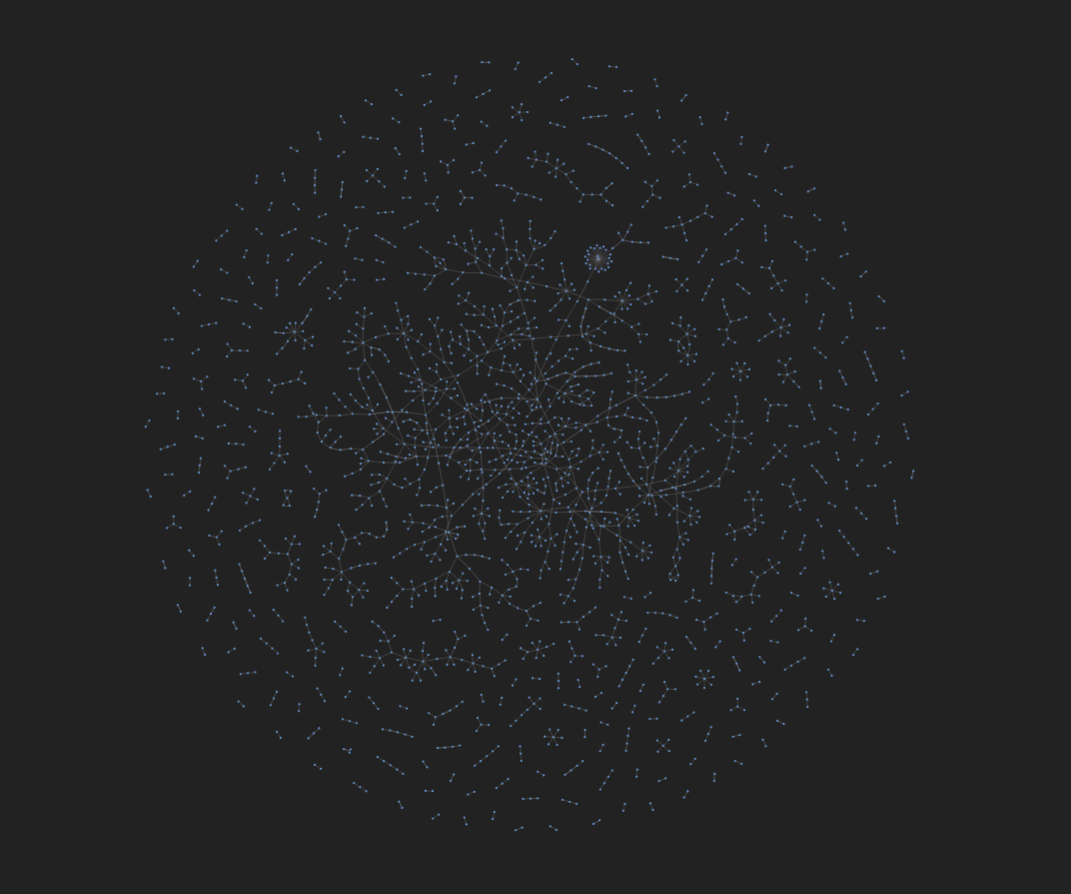

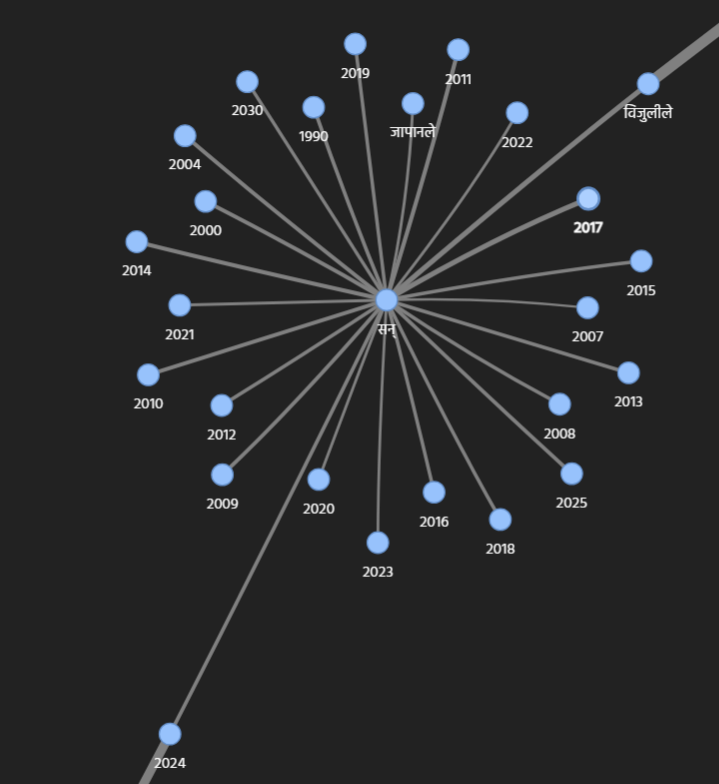

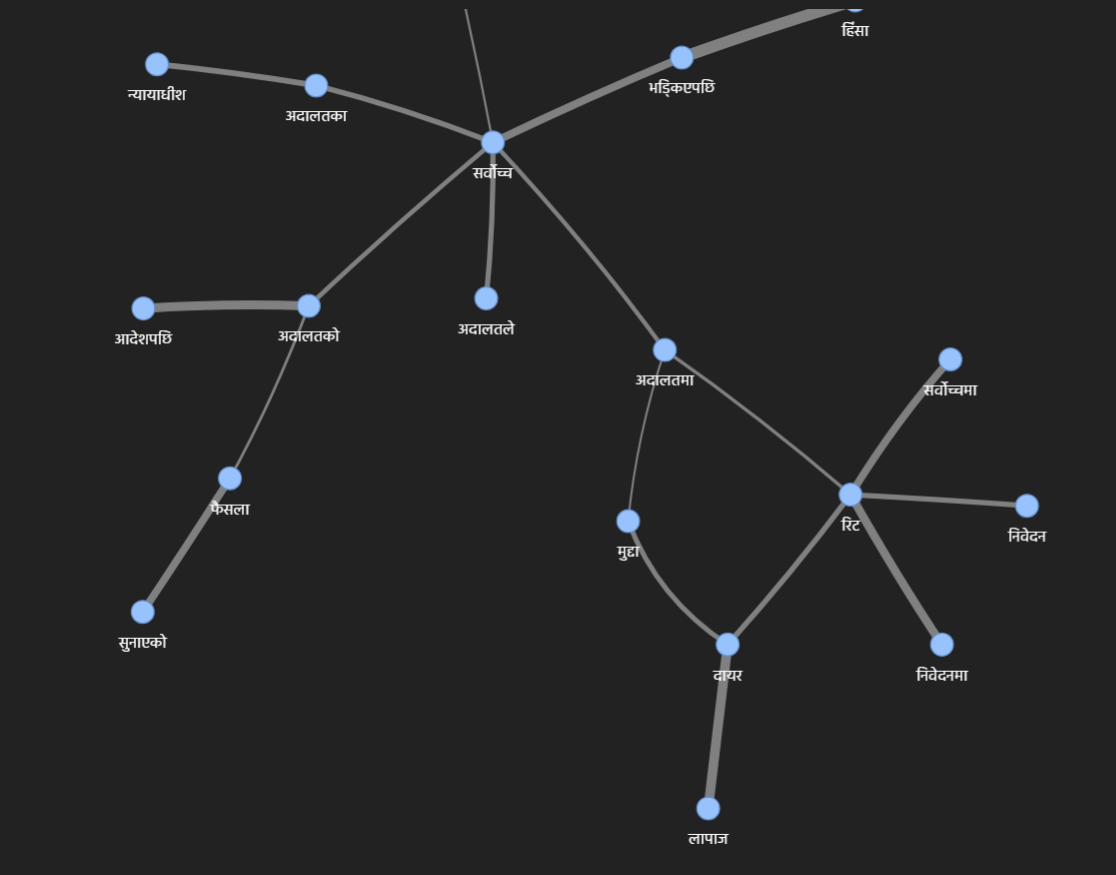

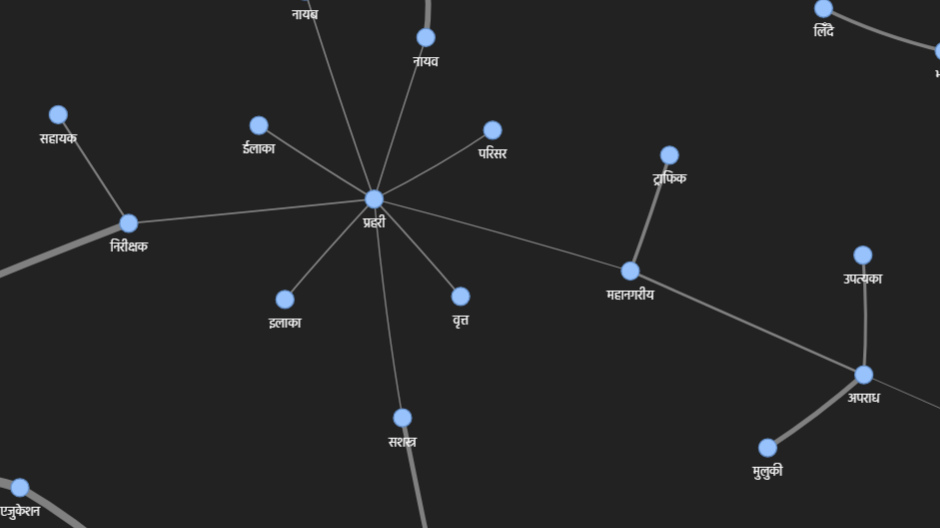

This little project successfully modeled the linguistic structure of a 200,000-article Nepali news corpus using probabilistic and information-theoretic methods. By applying Zipf’s Law, we first validated that the dataset follows natural linguistic patterns, providing a reliable foundation for higher-level analysis.

The core findings of this study are as follows:

Semantic Modularity: The visualization of Pointwise Mutual Information (PMI) revealed a highly modular "knowledge architecture." The emergence of disjoint subgraphs (clusters) proved that the Nepali news cycle is composed of distinct thematic silos—such as politics, weather, and administration—each governed by its own unique set of high-glue word pairings.

Contextual Predictive Power: Through Bayesian Inference, we quantified the transition from general language expectations (Priors) to specific contextual certainties (Posteriors). The massive "Evidence Strength" found in pairs like ऊर्जा-जलस्रोत (3200.63x) and केपी-शर्मा (815.32x) demonstrates that the model successfully identified fixed lexical entities and technical collocations.

Information Gain: The application of KL Divergence allowed us to rank words by their "Surprise Factor." We discovered that words like मौसम (KL: 10.00) act as powerful contextual anchors that drastically reduce linguistic uncertainty, whereas hub words like नेपाल serve as broad semantic connectors with lower information gain.